0.6600000000000004

1.580999999999995

-0.14

array([[1.00000000e-20, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e-20],
       [9.99985000e-01, 9.99985000e-01, 9.99985000e-01, ...,
        9.99997000e-01, 9.99997000e-01, 9.99997000e-01],
       [9.99946700e-01, 9.99946700e-01, 9.99946700e-01, ...,
        9.99992000e-01, 9.99992000e-01, 9.99992000e-01],
       ...,
       [0.00000000e+00, 3.00191563e-03, 9.12172849e-03, ...,
        9.87231429e-01, 9.87230446e-01, 9.87230446e-01],
       [0.00000000e+00, 3.01512017e-03, 9.16045267e-03, ...,
        9.87139256e-01, 9.87138273e-01, 9.87138273e-01],
       [0.00000000e+00, 3.06793000e-03, 9.32089800e-03, ...,
        1.00442900e+00, 1.00442800e+00, 1.00000000e-20]])

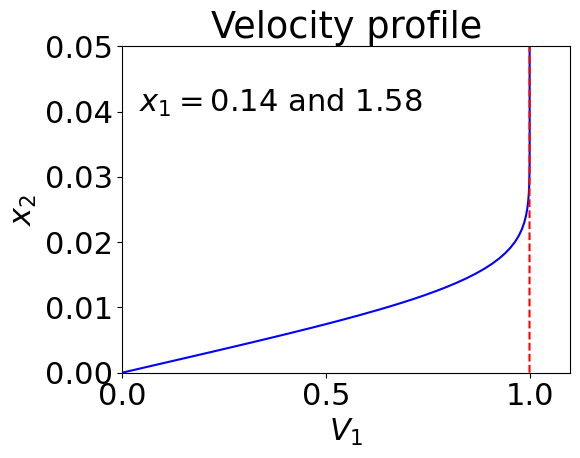

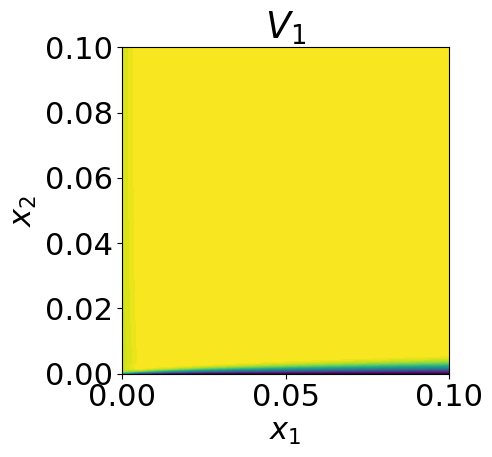

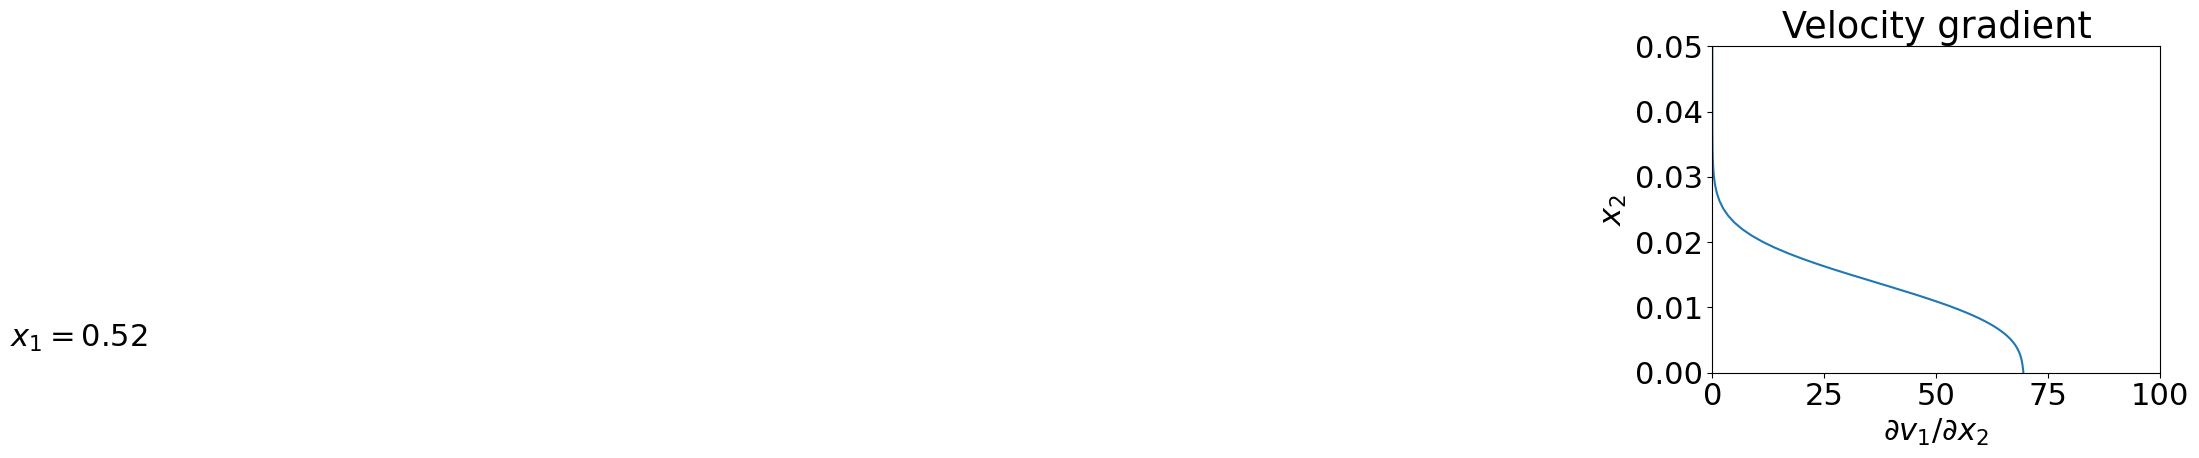

In [1]:
import numpy as np
from boundary_layer import *

a = (v1,(ni,nj))

# Coordinates of the points
display(xc[85])
display(xc[170])
display(xc[5])

# V_1inf, v1 freestream velocity
display(v1_2d)


## E1 Subtask 1

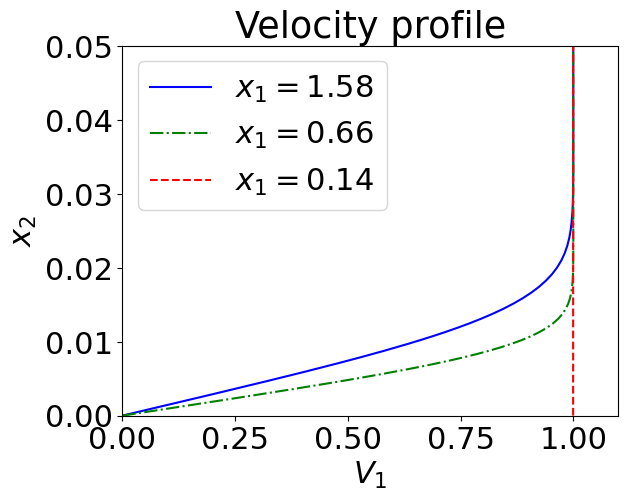

In [2]:
# Substask 1

i=170 # plot the velocity profile for i=170
plt.plot(v1_2d[i,:], x2_2d[i,:], 'b-', label='$x_1=1.58$')

i=85 # plot the velocity profile for i=85
plt.plot(v1_2d[i,:], x2_2d[i,:], 'g-.', label='$x_1=0.66$')

i=5 # plot the velocity profile for i=5
plt.plot(v1_2d[i,:], x2_2d[i,:], 'r--', label='$x_1=0.14$')

plt.title('Velocity profile')
plt.axis([0,1.1,0,0.05])
plt.xlabel('$V_1$') 
plt.ylabel('$x_2$') 

plt.legend(loc='best')
plt.savefig('velprof.png')


## E1 Subtask 2

V1_inf: 0.9896767627558745


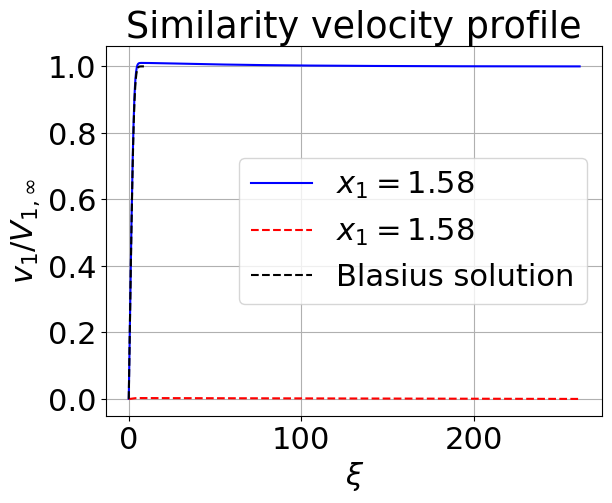

In [3]:
i = 170 # plot the dimensioneless velocity profile for i=170

# Freestream velocity at x1 location
V1_inf = v1_2d[i,-1] 

xi = yp * np.sqrt(V1_inf / (viscos * xc[i]))
v1_norm = v1_2d[i, :] / V1_inf
v2_norm = v2_2d[i, :] / V1_inf

print('V1_inf:', V1_inf)

#print(v2_norm)



# Plot
plt.figure()
plt.plot(xi, v1_norm, 'b-', label=fr'$x_1={xc[i]:.2f}$')
plt.plot(xi, v2_norm, 'r--', label=fr'$x_1={xc[i]:.2f}$')

# Adding Blasius solution for comparison
plt.plot(xi_blas, u_blas, 'k--', label='Blasius solution')

plt.xlabel(r'$\xi$')
plt.ylabel(r'$v_1 / V_{1,\infty}$')
plt.title('Similarity velocity profile')
plt.legend()
plt.grid(True)
plt.show()


## E2

0.02196174575714901
57
0.02463831745407603


/var/folders/sx/4z1m0py94c98d4j3s1g4lz7m0000gn/T/ipykernel_23083/973865662.py:11: RuntimeWarning: invalid value encountered in sqrt
  delta_gg_blasius = 5 * np.sqrt((viscos * xc)/V1_inf)


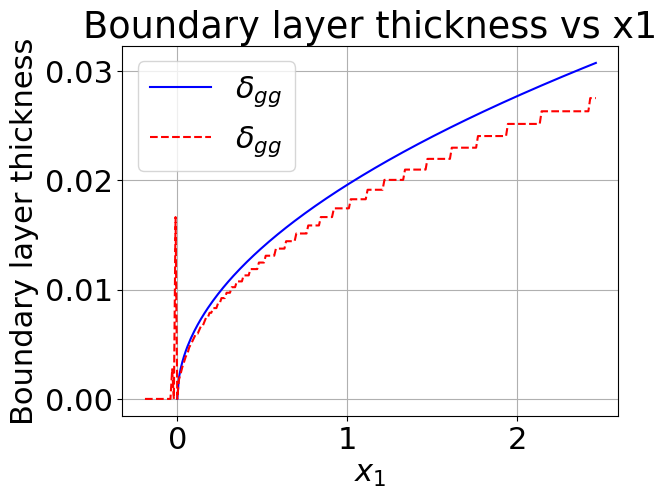

In [4]:


# Need to find x2 at the location where v1 = 0.99*V1_inf
index_gg_test = np.where(v1_2d[i,:] >= 0.99*V1_inf)[0][0]
delta_gg_test = x2_2d[i,index_gg_test]
print(delta_gg_test)
print(index_gg_test)

delta_gg = 5 * np.sqrt((viscos * xc[i])/V1_inf)
print(delta_gg)

# Need to now plot delta_gg and delta_gg_blasius as a function of x1
delta_gg_blasius = 5 * np.sqrt((viscos * xc)/V1_inf)
delta_gg_all = np.zeros_like(xc)

for i in range(len(xc)):
    V1_inf = v1_2d[i,-1]
    index_99 = np.where(v1_2d[i,:] >= 0.99*V1_inf)[0][0]
    delta_gg_all[i] = x2_2d[i,index_99]

plt.figure()
plt.plot(xc, delta_gg_blasius, 'b-', label=r'$\delta_{gg}$')
plt.plot(xc, delta_gg_all, 'r--', label=r'$\delta_{gg}$')
plt.xlabel(r'$x_1$')
plt.ylabel(r'Boundary layer thickness')
plt.title('Boundary layer thickness vs x1')
plt.legend()
plt.grid(True)
plt.show()

#delta_star = 

/var/folders/sx/4z1m0py94c98d4j3s1g4lz7m0000gn/T/ipykernel_23083/3979287966.py:46: RuntimeWarning: invalid value encountered in sqrt
  delta_star_blasius[i] = 1.721 * np.sqrt((viscos * x1[i]) / Vinf)
/var/folders/sx/4z1m0py94c98d4j3s1g4lz7m0000gn/T/ipykernel_23083/3979287966.py:47: RuntimeWarning: invalid value encountered in sqrt
  theta_blasius[i]      = 0.664 * np.sqrt((viscos * x1[i]) / Vinf)


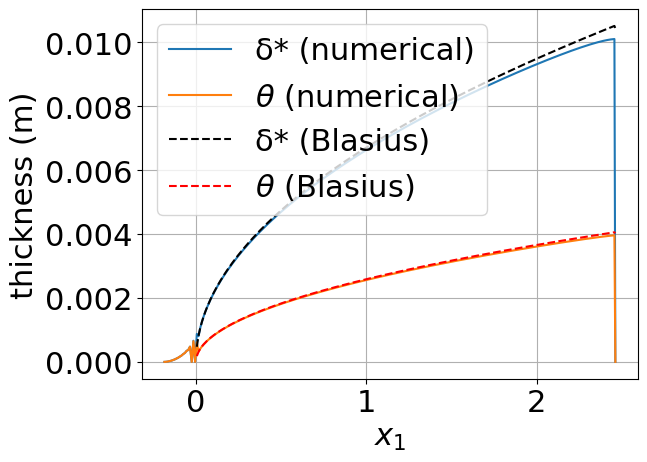

In [5]:
ni, nj = v1_2d.shape
# Creating empty arrays to store results
delta_star = np.zeros(ni)
theta = np.zeros(ni)

delta_star_blasius = np.zeros(ni)
theta_blasius = np.zeros(ni)

x1 = x1_2d[:,0]

for i in range(ni):
    # local x2 array 
    x2 = x2_2d[i, :]

    # local velocity profile
    u = v1_2d[i, :].copy()

    # local freestream velocity (could also use constant V1_inf = 1.0)
    Vinf = np.max(v1_2d[i,:])
    if Vinf == 0:
        # avoid division by zero, skipping or setting to NaN
        delta_star[i] = np.nan
        theta[i] = np.nan
        continue


    # normalized velocity
    uhat = v1_2d[i,:] / Vinf

    # finding index of maximum u
    jmax = np.argmax(u)  # returns first index of maximum
    

    # integration domain up to jmax (include jmax)
    x2_int = x2[:jmax+1]
    uhat_int = uhat[:jmax+1]

    # integrands
    integrand_delta = 1.0 - uhat_int
    integrand_theta = uhat_int * (1.0 - uhat_int)

    # trapezoidal integration
    delta_star[i] = np.trapz(integrand_delta, x2_int)
    theta[i]      = np.trapz(integrand_theta, x2_int)

    delta_star_blasius[i] = 1.721 * np.sqrt((viscos * x1[i]) / Vinf)
    theta_blasius[i]      = 0.664 * np.sqrt((viscos * x1[i]) / Vinf)


    #delta_star_blasius[i] = np.trapz(1.7208 * np.sqrt((viscos * xc[i]) / Vinf, x2_int))
    #theta_blasius[i] = np.trapz(0.664 * np.sqrt((viscos * xc[]) / Vinf, x2_int))

# Plotting
plt.figure()
plt.plot(x1[1:], delta_star[1:], label="δ* (numerical)")
plt.plot(x1[1:], theta[1:], label=r'$\theta$ (numerical)')
plt.plot(x1, delta_star_blasius, 'k--', label="δ* (Blasius)")
plt.plot(x1, theta_blasius, 'r--', label=r'$\theta$ (Blasius)')
plt.xlabel('$x_1$')
plt.ylabel('thickness (m)')
plt.legend()
plt.grid(True)
plt.show()

#display(delta_star, theta)

## E3

Text(0.5, 0, '$\\partial V_1 / \\partial x_2$')

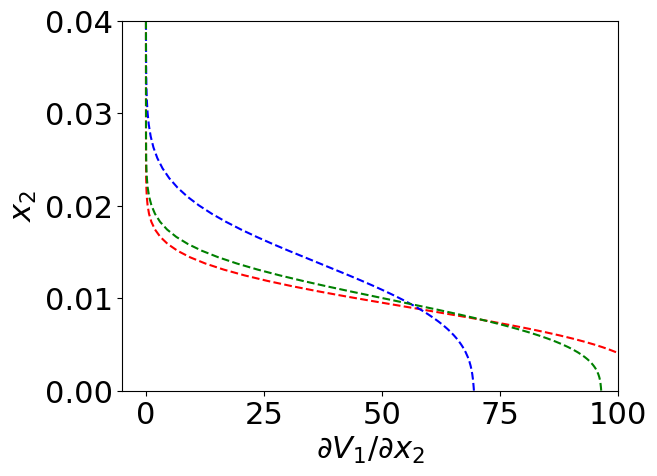

In [6]:
i = 85
gradient = np.gradient(v1_2d[i,:], x2_2d[i,:])
plt.figure()
plt.plot(gradient, x2_2d[i,:], 'r--')
i = 170
gradient = np.gradient(v1_2d[i,:], x2_2d[i,:])
plt.plot(gradient, x2_2d[i,:], 'b--')
i = 100
gradient = np.gradient(v1_2d[i,:], x2_2d[i,:])
plt.axis([-5,100,0,0.04])
plt.plot(gradient, x2_2d[i,:], 'g--')
plt.ylabel('$x_2$')
plt.xlabel('$\\partial V_1 / \\partial x_2$')

## E4

i = 19 Max dvdx at i = 2.4234276500000003


/var/folders/sx/4z1m0py94c98d4j3s1g4lz7m0000gn/T/ipykernel_23083/2678142324.py:20: RuntimeWarning: invalid value encountered in sqrt
  Cf_blas = 0.664 / np.sqrt((Vinf * x1) / viscos)
/var/folders/sx/4z1m0py94c98d4j3s1g4lz7m0000gn/T/ipykernel_23083/2678142324.py:23: RuntimeWarning: invalid value encountered in sqrt
  valid = np.isfinite(Cf) & (np.sqrt((Vinf * x1) / viscos) > 0) # Avoiding invalid values


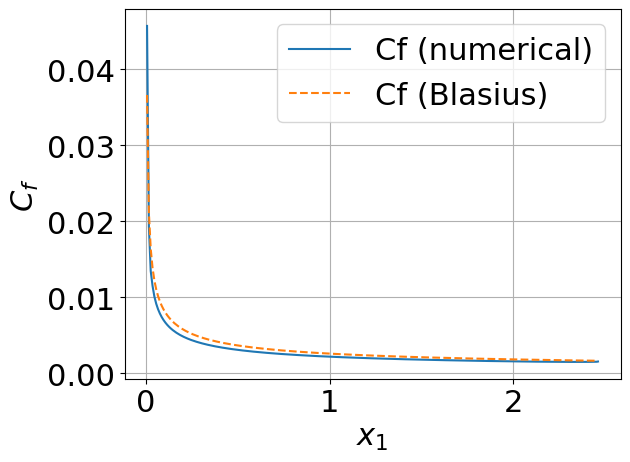

In [7]:

rho = 1.204

dvdx = np.gradient(v2_2d, xp, axis=0) 

tau12 = viscos * (dudy + dvdx)

max_i = np.unravel_index(np.argmax(dvdx, axis=None), dvdx.shape)[0]

print('i =', max_i, 'Max dvdx at i =', np.max(dvdx))

# extracting wall shear stress at the wall index j=0
tau_w = tau12[:,0]          

Vinf = 1 # freestream velocity

# local skin friction coefficient
Cf = tau_w / (0.5 * rho * Vinf**2)

# Blasius solution for Cf
Cf_blas = 0.664 / np.sqrt((Vinf * x1) / viscos)

# Plotting results
valid = np.isfinite(Cf) & (np.sqrt((Vinf * x1) / viscos) > 0) # Avoiding invalid values
plt.figure()
plt.plot(xp[valid], Cf[valid], label='Cf (numerical)')
plt.plot(xp[valid], Cf_blas[valid], '--', label='Cf (Blasius)')
plt.xlabel('$x_1$')
plt.ylabel('$C_f$')
plt.legend()
plt.grid(True)
plt.show()

## E5

/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:1243: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:1244: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:1250: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)

i = 251 Max vorticity at i = 163.08938227695728


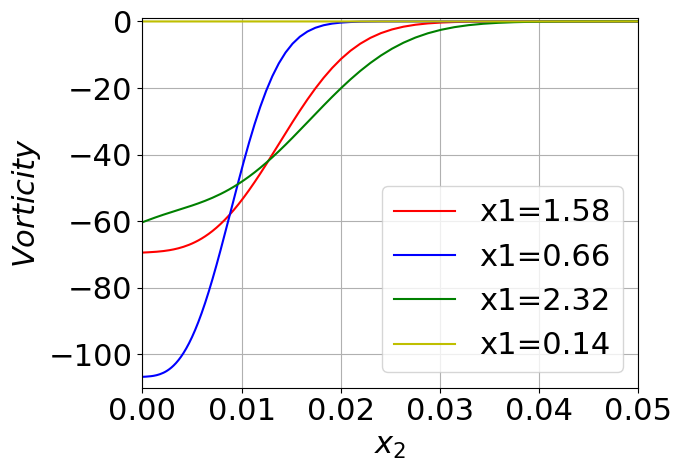

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

i = 170

dvdxe5 = np.gradient(v2_2d, xp, axis=0) 
dudye5 = np.gradient(v1_2d, yp, axis=1)
vorticity = (dvdx - dudy)

max_i = np.unravel_index(np.argmax(vorticity, axis=None), vorticity.shape)[0]

print('i =', max_i, 'Max vorticity at i =', np.max(vorticity))


plt.figure()
plt.plot(yp, vorticity[i,:], 'r-', label='x1=1.58')


i = 85

dvdxe5 = np.gradient(v2_2d[i,:], x1_2d[i,:], axis=0) 
dudye5 = np.gradient(v1_2d[i,:], x2_2d[i,:])
vorticity = (dvdx - dudy)


plt.plot(yp, vorticity[i,:], 'b-', label='x1=0.66')

i = 250

dvdxe5 = np.gradient(v2_2d[i,:], x1_2d[i,:], axis=0) 
dudye5 = np.gradient(v1_2d[i,:], x2_2d[i,:])
vorticity = (dvdx - dudy)

plt.plot(yp, vorticity[i,:], 'g-', label='x1=2.32')

i = 5

dvdxe5 = np.gradient(v2_2d[i,:], x1_2d[i,:], axis=0) 
dudye5 = np.gradient(v1_2d[i,:], x2_2d[i,:])
vorticity = (dvdx - dudy)

plt.plot(yp, vorticity[i,:], 'y-', label='x1=0.14')
plt.axis([0,0.05,-110,1])
plt.xlabel('$x_2$')
plt.ylabel('$Vorticity$')
plt.legend()
plt.grid(True)
plt.show()

## E6

[[ 1.00000000e+04  6.71268904e+03  4.04296700e-05 ...  7.53144300e-05
  -5.41234292e+01 -8.11852031e+01]
 [-6.66666667e-19  1.75192534e-05  3.31335300e-05 ...  6.46841983e-05
   3.33749600e-05 -6.66666667e-19]
 [ 0.00000000e+00  1.20348373e-05  2.28788325e-05 ...  4.38959175e-05
   2.06224775e-05  0.00000000e+00]
 ...
 [ 3.00191563e+01  3.00028988e+01  2.99444839e+01 ... -8.50922920e-05
  -2.22852429e-05  0.00000000e+00]
 [ 3.01512017e+01  3.01326196e+01  3.00658820e+01 ... -9.07323151e-05
  -1.71918035e-05  6.06060606e-19]
 [ 3.06793000e+01  3.06603922e+01  3.05924823e+01 ... -8.11852031e-05
  -5.43631410e+01 -8.15446911e+01]]
[[ 1.00000000e+04  6.71268900e+03 -4.04296700e-05 ... -7.53144300e-05
  -5.41235082e+01 -8.11852031e+01]
 [ 6.66666667e-19 -1.75192566e-05 -3.31335300e-05 ... -6.46841983e-05
  -3.33749600e-05  6.66666667e-19]
 [ 0.00000000e+00 -1.20348377e-05 -2.28788325e-05 ... -4.38959175e-05
  -2.06224775e-05  0.00000000e+00]
 ...
 [ 3.00191563e+01  3.00028986e+01  2.9944477

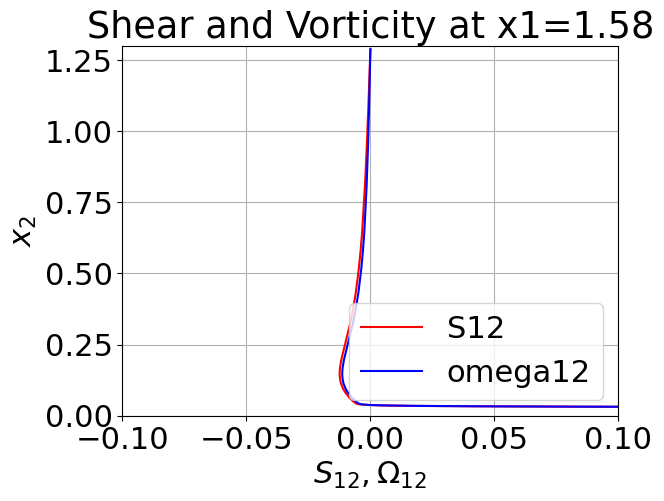

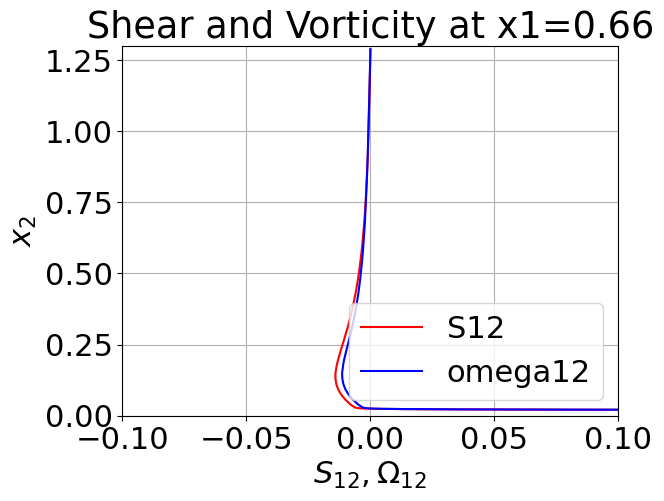

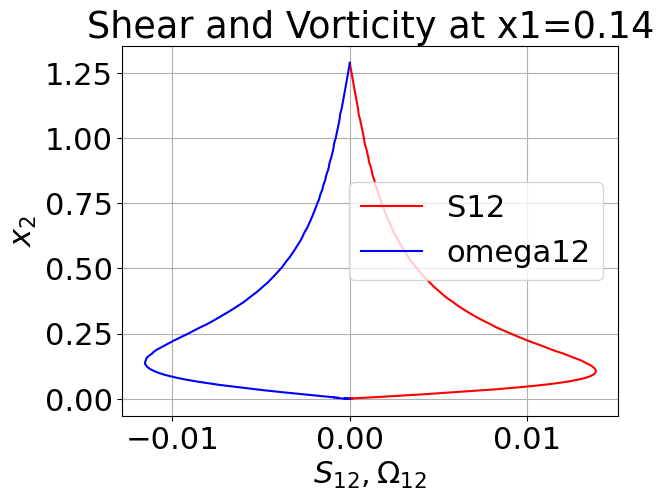

In [9]:
S12 = 0.5 * (dudy + dvdx)
omega12 = 0.5 * (dudy - dvdx)

print(S12)
print(omega12)

max_i = np.unravel_index(np.argmax(S12, axis=None), S12.shape)[0]

print('i =', max_i, 'Max S12 at i =', np.max(S12))

max_i = np.unravel_index(np.argmax(omega12, axis=None), omega12.shape)[0]

print('i =', max_i, 'Max omega12 at i =', np.max(omega12))

i = 170

plt.figure()
plt.plot(S12[i,:], yp, 'r-', label='S12')
plt.plot(omega12[i,:], yp, 'b-', label='omega12')
plt.title('Shear and Vorticity at x1=1.58')
plt.xlabel('$S_{12}, \\Omega_{12}$')
plt.ylabel('$x_2$')
plt.legend()
plt.axis([-0.1,0.1,0,1.3])
plt.grid(True)
plt.show()

i = 85

plt.figure()
plt.plot(S12[i,:], yp, 'r-', label='S12')
plt.plot(omega12[i,:], yp, 'b-', label='omega12')
plt.title('Shear and Vorticity at x1=0.66')
plt.xlabel('$S_{12}, \\Omega_{12}$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid(True)
plt.axis([-0.1,0.1,0,1.3])
plt.show()

i = 5

plt.figure()
plt.plot(S12[i,:], yp, 'r-', label='S12')
plt.plot(omega12[i,:], yp, 'b-', label='omega12')
plt.title('Shear and Vorticity at x1=0.14')
plt.xlabel('$S_{12}, \\Omega_{12}$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid(True)
plt.show()

# X2 (y) value is incorrect, need to be calculated based on given height and amount of elements.

# Change axels, meaning x on y axis, and then plot for x1 coordinates, meaning x1=i for example.





## E7 Subtask 1

Look at equation (2.10) for tau formulation

(252, 200)
(252, 200)


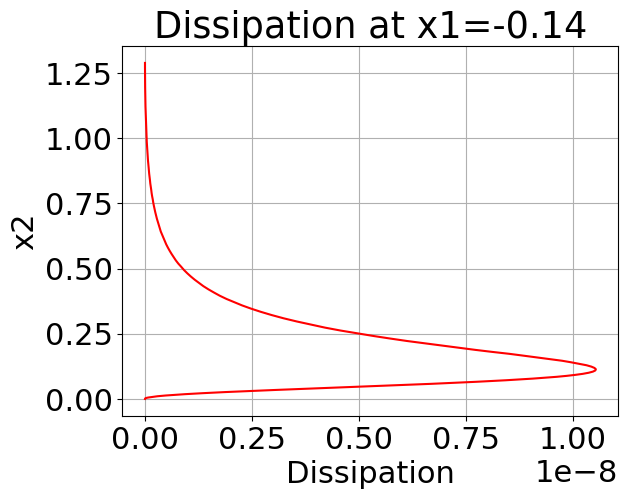

i = 18 Max dissipation at i = 0.0005705231228758274
0.0005705231228758274


In [10]:
dissipation = tau12 * dvdx
print(np.shape(tau12))
print(np.shape(dissipation))
# need one plot for each x1 location

i = 5
plt.figure()
plt.plot(dissipation[i, :], yp, 'r-')
plt.title(f'Dissipation at x1={xc[i]:.2f}')
plt.xlabel('Dissipation')
plt.ylabel('x2')
plt.grid(True)
plt.show()

max_i = np.unravel_index(np.argmax(dissipation, axis=None), dissipation.shape)[0]

print('i =', max_i, 'Max dissipation at i =', np.max(dissipation))

#for i in range(ni-1):
    #plt.figure()
    #plt.plot(dissipation[i, :], yp[i, :], 'r-')
    #plt.title(f'Dissipation at x1={xc[i]:.2f}')
    #plt.xlabel('Dissipation')
    #plt.ylabel('x2')
    #plt.grid(True)
    #plt.show()

print(np.max(dissipation))

max_dissipation_guess = -np.inf
max_i = 0
for i in range(ni):
    current_max = np.max(dissipation[i, :])
    if current_max > max_dissipation_guess:
        max_dissipation_guess = current_max
        max_i = i

## E7 Subtask 2

[[-6.08000000e-19  8.71190140e-06  9.93811396e-14 ...  3.44873613e-13
  -1.29909741e-07  4.93606035e-21]
 [ 2.70222222e-41  1.86609955e-14  6.67481133e-14 ...  2.54389967e-13
   6.77243877e-14  2.70222222e-41]
 [ 0.00000000e+00  8.80610850e-15  3.18252114e-14 ...  1.17152576e-13
   2.58574240e-14  0.00000000e+00]
 ...
 [ 0.00000000e+00  1.53339989e-10  5.68331357e-09 ...  1.30612545e-13
   1.21755804e-14  0.00000000e+00]
 [ 1.11102610e-21  2.85914141e-10  6.42473767e-09 ...  6.03761234e-14
   4.07009209e-15  2.23324151e-41]
 [ 1.69572858e-21  0.00000000e+00  0.00000000e+00 ... -0.00000000e+00
  -0.00000000e+00 -4.50719747e-21]]
Total dissipation Q = -5.014887922901744e-07
Temperature decrease dT = -1.2079044294111069e-12 K over dt = 0.01 s


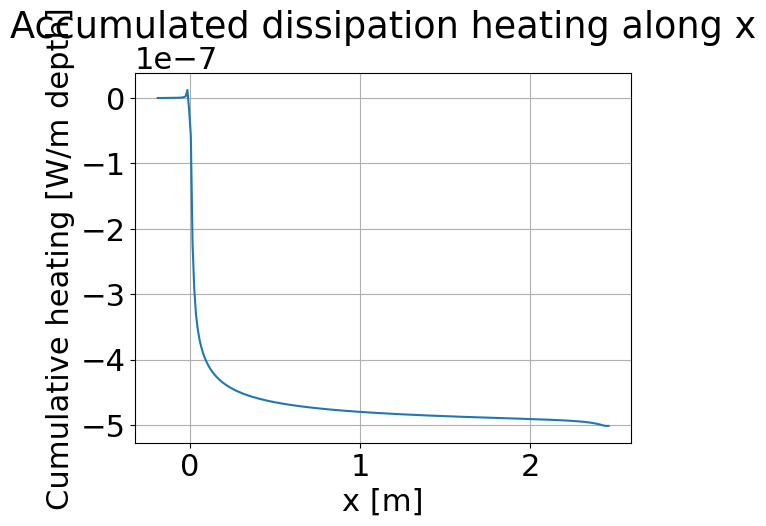

In [11]:
dissipation = tau12 * dvdx

print(dissipation)

# assume xp, yp are 1D grids (nonuniform spacing possible)
dx = np.gradient(xp)   # length ni
dy = np.gradient(yp)   # length nj

# build 2D cell area grid
dx2d, dy2d = np.meshgrid(dx, dy, indexing="ij")
dA = dx2d * dy2d

# integrate dissipation over the domain
Q_total = np.sum(dissipation * dA)

Q_cumulative = np.cumsum(np.sum(dissipation * dA, axis=1))   

print("Total dissipation Q =", Q_total)

rho = 1.204    # kg/m^3
cp = 1005      # J/kg-K

V = np.sum(dA)     
dt = 0.01          

dT = (Q_total * dt) / (rho * cp * V)

print("Temperature decrease dT =", dT, "K over dt =", dt, "s")

plt.plot(xp, Q_cumulative)
plt.xlabel("x [m]")
plt.ylabel("Cumulative heating [W/m depth]")
plt.title("Accumulated dissipation heating along x")
plt.grid(True)
plt.show()

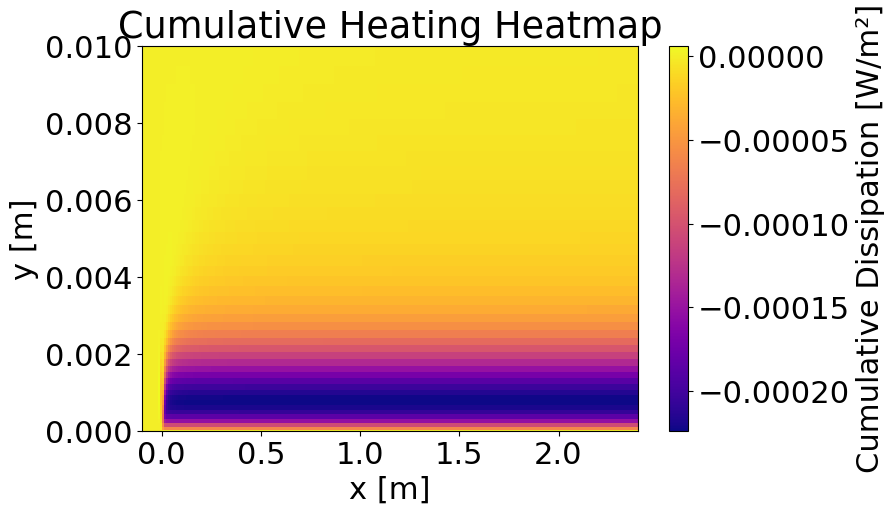

In [12]:
# physical properties
rho = 1.204   # air density [kg/m^3]
cp  = 1005    # specific heat at 20C [J/kg/K]

# grid spacing
dx = np.gradient(xp)      # length ni
dy = np.gradient(yp)      # length nj

# make 2D arrays of dx, dy so shape matches dissipation
dx2d, dy2d = np.meshgrid(dx, dy, indexing="ij")
dA = dx2d * dy2d          # cell areas (ni, nj)

# integrate dissipation over cross-section for each x
Q_x = np.sum(dissipation * dA, axis=1)   # shape (ni,), power per streamwise slice

# cumulative heating up to each x
Q_cumulative = np.cumsum(Q_x)            # shape (ni,), total energy input (W per unit span)

# cumulative sum along x-direction (axis=0)
dissipation_cum = np.cumsum(dissipation * dx[:,None], axis=0)

plt.figure(figsize=(8,5))
plt.pcolormesh(xp, yp, dissipation_cum.T, shading="auto", cmap="plasma")
plt.colorbar(label="Cumulative Dissipation [W/m²]")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.title("Cumulative Heating Heatmap")
plt.axis([-0.1,2.4,0,0.01])
plt.show()



## E7 Subtask 3

S_ij =  np.array([[dudx, 0.5 * (dudy + dvdx)],
                [0.5 * (dvdx + dudy), dvdy]])

grad_v_ij = np.array([[dudx, dudy],
                      [dvdx, dvdy]])

Phi = 2 * viscos * np.sum(S_ij * grad_v_ij, axis=(0, 1))

dT_field = Phi / (rho * cp) # Creating a field for temperature rise

Tb = np.zeros(ni)
for i in range(ni):
    u = v1_2d[i, :]          # velocity profile at x
    Tloc = dT_field[i, :] # local deltaT
    num = np.trapz(u * Tloc, yp)  # numerator using trapz
    den = np.trapz(u, yp)         # denominator using trapz
    Tb[i] = num / den if den > 0 else np.nan

DeltaTb = Tb[-1] - Tb[0]
print("Bulk temperature rise ΔTb =", DeltaTb, "K")


# Heatmap of local delta T
plt.figure(figsize=(8,4))
plt.contourf(x1_2d, x2_2d, dT_field, levels=50, cmap="inferno")
plt.colorbar(label="ΔT [K]")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Local ΔT field (viscous heating)")
plt.tight_layout()
plt.show()

# Bulk delta T vs x
plt.figure(figsize=(6,4))
plt.plot(xp, Tb, label="Bulk temperature")
plt.xlabel("$x_1$")
plt.ylabel("$T_b$ [K]")
plt.title("Bulk temperature evolution")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("ΔT range:", dT_field.min(), dT_field.max())

## E8

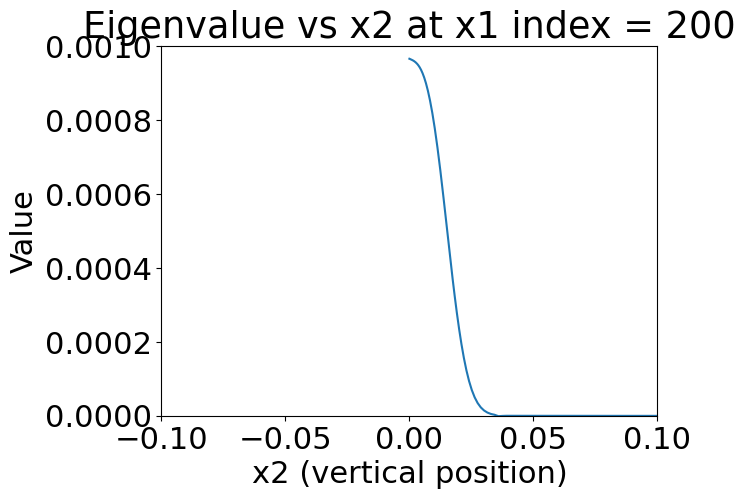

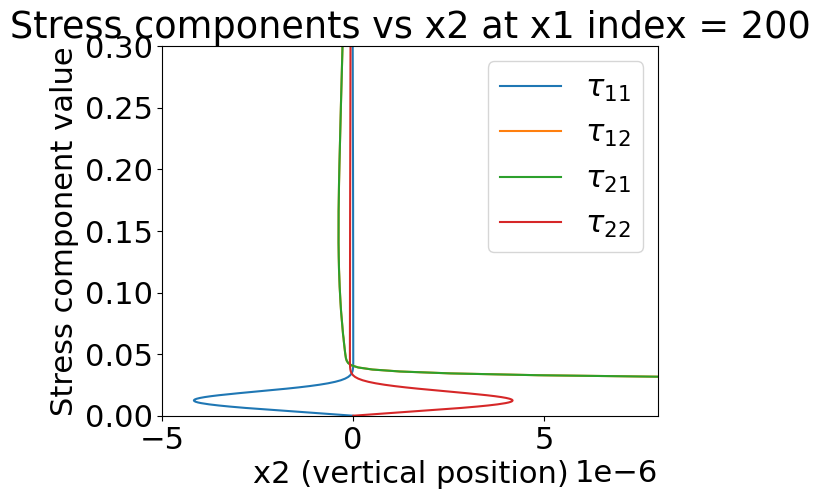

[[-0.99990457 -0.01381524]
 [ 0.01381524 -0.99990457]]


In [13]:
dvdy = np.gradient(v2_2d, yp, axis=1)

tau11 = viscos * (dudx + dudx)
tau12 = tau12
tau21 = tau12 # Due to stress tensor being a symmetric tensor
tau22 = viscos * (dvdy + dvdy)

ni, nj = tau11.shape
eigvals = np.zeros((ni, nj, 2)) # Creates a vector of length 2 for each (i,j) point
eigvecs = np.zeros((ni, nj, 2, 2)) # Creates a 2x2 matrix for each (i,j) point

for i in range(ni): # Loop over all ni values
    for j in range(nj): # Loop over all nj values
        tau = np.array([[tau11[i,j], tau12[i,j]],
                        [tau21[i,j], tau22[i,j]]])
        vals, vecs = np.linalg.eig(tau)
        eigvals[i,j] = vals
        eigvecs[i,j] = vecs

#print('Eigenvalues', eigvals)
#print('Eigenvectors', eigvecs)

i = 200  
eigval_slice = eigvals[i, :, 1]   
tau11_slice = tau11[i, :]
tau12_slice = tau12[i, :]
tau21_slice = tau21[i, :]
tau22_slice = tau22[i, :]


# Eigenvalue vs vertical position
plt.plot(yp, eigval_slice, label="Eigenvalue")
plt.xlabel("x2 (vertical position)")
plt.ylabel("Value")
plt.title(f"Eigenvalue vs x2 at x1 index = {i}")
plt.axis([-0.1,0.1,0,0.001])
plt.show()

plt.plot(tau11_slice, yp, label=r"$\tau_{11}$")
plt.plot(tau12_slice, yp, label=r"$\tau_{12}$")
plt.plot(tau21_slice, yp, label=r"$\tau_{21}$")
plt.plot(tau22_slice, yp, label=r"$\tau_{22}$")
plt.axis([-0.000005,0.000008,0,0.3])
plt.xlabel("x2 (vertical position)")
plt.ylabel("Stress component value")
plt.title(f"Stress components vs x2 at x1 index = {i}")
plt.legend()
plt.show()



print(eigvecs[1,4])

## E9

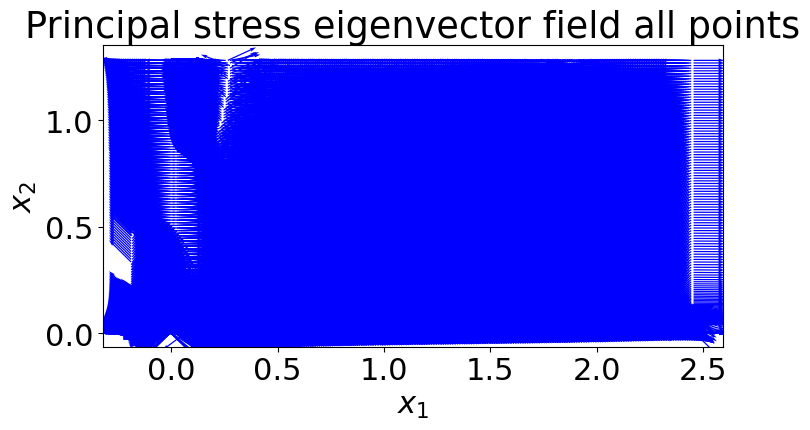

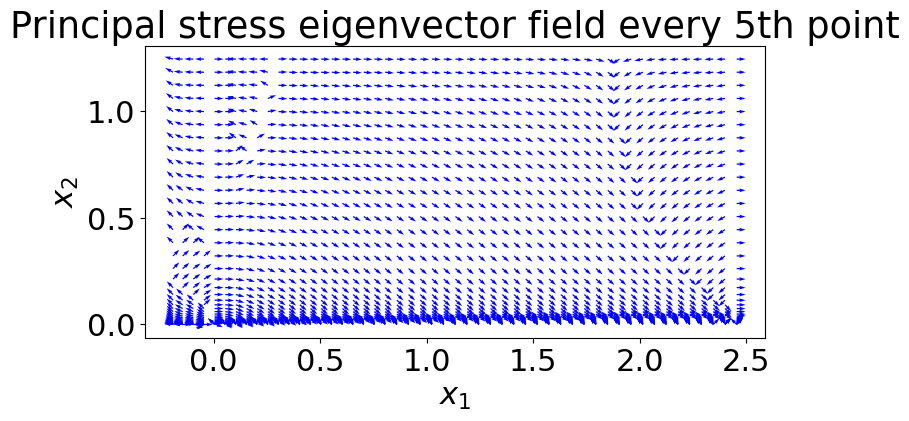

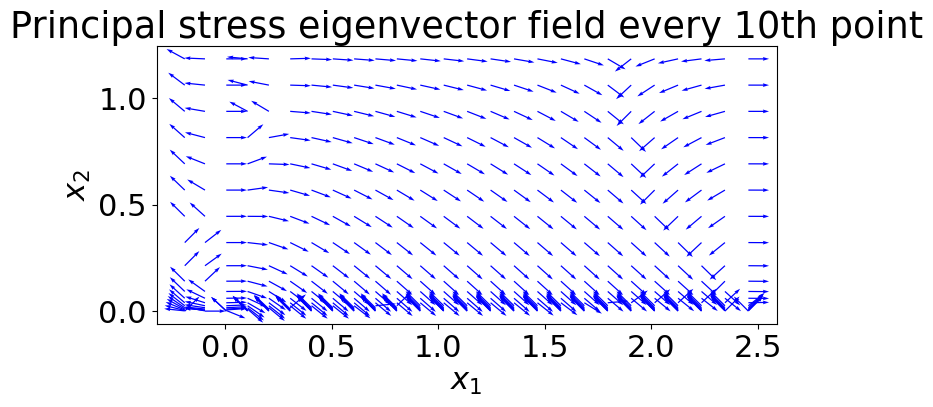

In [14]:
principal_vecs = eigvecs[:,:, :,0]   # Picking the first row of the eigenvector matrix
# Each eigenvalue has two eigenvectors

# extract components
u_quiver = principal_vecs[:,:,0]   # x-component of eigenvector
v_quiver = principal_vecs[:,:,1]   # y-component of eigenvector

plt.figure(figsize=(8,6))
plt.quiver(x1_2d, x2_2d, u_quiver, v_quiver, 
           scale=20, width=0.002, color="blue")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Principal stress eigenvector field all points")
plt.axis("scaled")
plt.show()

step = 5  # plotting every 5th point
plt.figure(figsize=(8,6))
plt.quiver(x1_2d[::step, ::step], x2_2d[::step, ::step],
           u_quiver[::step, ::step], v_quiver[::step, ::step],
           scale=70, width=0.002, color="blue")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Principal stress eigenvector field every 5th point")
plt.axis("scaled")
plt.show()

step = 10  # plotting every 5th point
plt.figure(figsize=(8,6))
plt.quiver(x1_2d[::step, ::step], x2_2d[::step, ::step],
           u_quiver[::step, ::step], v_quiver[::step, ::step],
           scale=30, width=0.002, color="blue")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Principal stress eigenvector field every 10th point")
plt.axis("scaled")
plt.show()

## E10

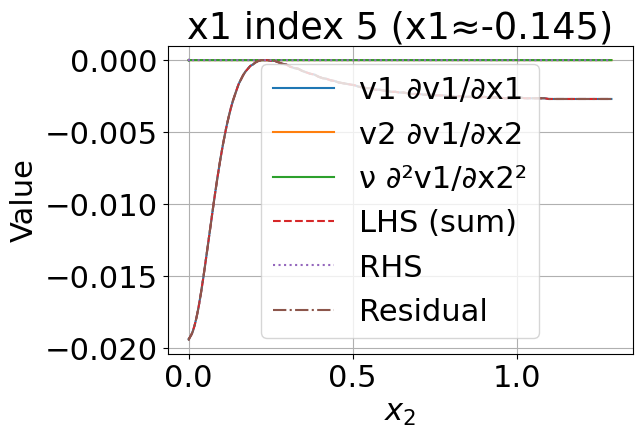

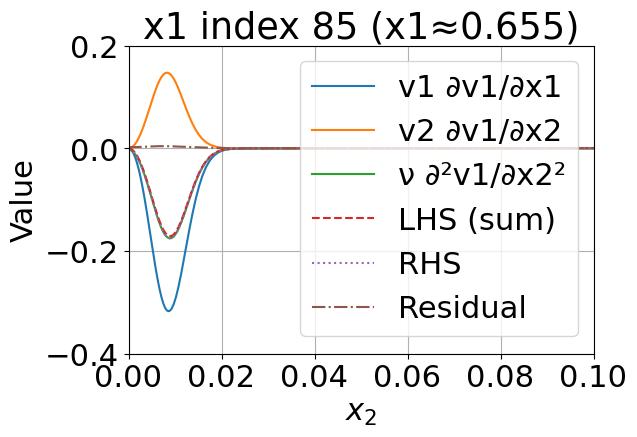

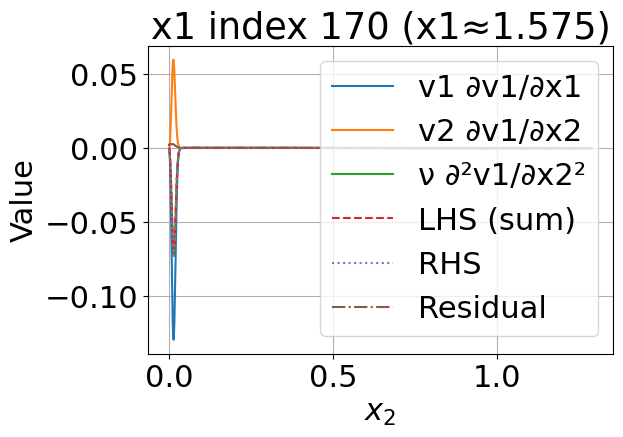

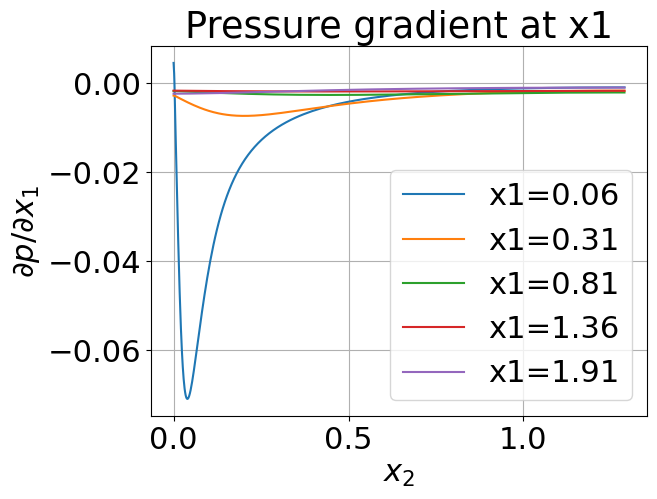

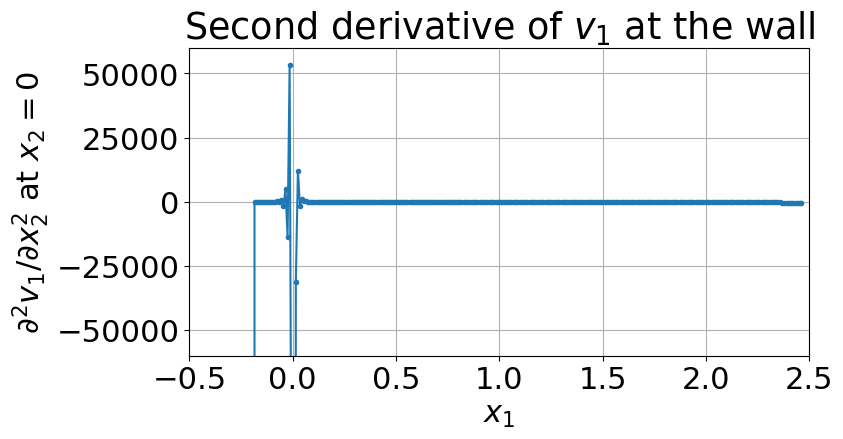

i = 18 Max dissipation at i = 53273.98233480255
x1 ≈ 0.3050, d2v1/dx2^2 at wall = -1.054449e+02


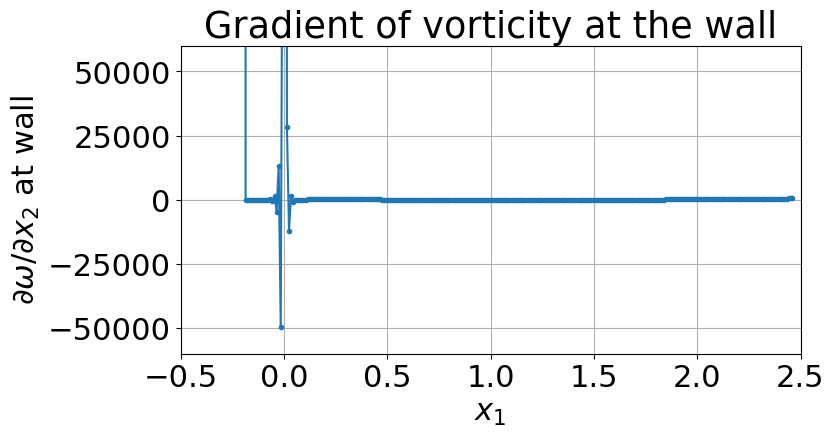

In [20]:
d2v1_dx2 = np.gradient(dudy, yp, axis=1)

term1 = v1_2d * dudx
term2 = v2_2d * dudy
term3 = viscos * d2v1_dx2

left_side = term1 + term2
right_side = term3

residual = left_side - right_side

i = 5

plt.figure(figsize=(6,4))
plt.plot(yp, term1[i,:], label='v1 ∂v1/∂x1')
plt.plot(yp, term2[i,:], label='v2 ∂v1/∂x2')
plt.plot(yp, term3[i,:], label='ν ∂²v1/∂x2²')
plt.plot(yp, left_side[i,:], '--', label='LHS (sum)')
plt.plot(yp, right_side[i,:], ':', label='RHS')
plt.plot(yp, residual[i,:], '-.', label='Residual')
plt.xlabel('$x_2$'); plt.ylabel('Value')
plt.title(f'x1 index {i} (x1≈{xp[i]:.3f})')
plt.legend(); plt.grid(True); plt.show()

i = 85

plt.figure(figsize=(6,4))
plt.plot(yp, term1[i,:], label='v1 ∂v1/∂x1')
plt.plot(yp, term2[i,:], label='v2 ∂v1/∂x2')
plt.plot(yp, term3[i,:], label='ν ∂²v1/∂x2²')
plt.plot(yp, left_side[i,:], '--', label='LHS (sum)')
plt.plot(yp, right_side[i,:], ':', label='RHS')
plt.plot(yp, residual[i,:], '-.', label='Residual')
plt.axis([0,0.1,-0.4,0.2])
plt.xlabel('$x_2$'); plt.ylabel('Value')
plt.title(f'x1 index {i} (x1≈{xp[i]:.3f})')
plt.legend(); plt.grid(True); plt.show()

i = 170

plt.figure(figsize=(6,4))
plt.plot(yp, term1[i,:], label='v1 ∂v1/∂x1')
plt.plot(yp, term2[i,:], label='v2 ∂v1/∂x2')
plt.plot(yp, term3[i,:], label='ν ∂²v1/∂x2²')
plt.plot(yp, left_side[i,:], '--', label='LHS (sum)')
plt.plot(yp, right_side[i,:], ':', label='RHS')  
plt.plot(yp, residual[i,:], '-.', label='Residual')
plt.xlabel('$x_2$'); plt.ylabel('Value')
plt.title(f'x1 index {i} (x1≈{xp[i]:.3f})')
plt.legend(); plt.grid(True); plt.show()


dpdx1, dpdx2 = np.gradient(p_2d, xp, yp, edge_order=2)


i = 25

# plot ∂p/∂x1 vs x2
plt.plot(yp, dpdx1[i, :], label=f"x1={xc[i]:.2f}")
plt.xlabel("$x_2$")
plt.ylabel(r"$\partial p / \partial x_1$")
plt.title(f"Pressure gradient at x1")
plt.grid(True)

i = 50

plt.plot(yp, dpdx1[i, :], label=f"x1={xc[i]:.2f}")

i = 100

plt.plot(yp, dpdx1[i, :], label=f"x1={xc[i]:.2f}")

i = 150

plt.plot(yp, dpdx1[i, :], label=f"x1={xc[i]:.2f}")

i = 200

plt.plot(yp, dpdx1[i, :], label=f"x1={xc[i]:.2f}")
plt.legend()
plt.show()



# 2) second derivative ∂^2 v1 / ∂ x2^2
d2v1_dx1dx2, d2v1_dx2sq = np.gradient(dudy, xp, yp, edge_order=2)

d2_at_wall = d2v1_dx2sq[:, 0] # Extracting values at the wall (j=0)

plt.figure(figsize=(8,4))
plt.plot(xp, d2_at_wall, '-o', markersize=3)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$\partial^2 v_1/\partial x_2^2\ \mathrm{at}\ x_2=0$')
plt.title('Second derivative of $v_1$ at the wall')
plt.axis([-0.5,2.5,-0.0006*10**8,0.0006*10**8])
plt.grid(True)
plt.show()

max_i = np.unravel_index(np.argmax(d2_at_wall, axis=None), d2_at_wall.shape)[0]

print('i =', max_i, 'Max dissipation at i =', np.max(d2_at_wall))


i = 50
print(f"x1 ≈ {xp[i]:.4f}, d2v1/dx2^2 at wall = {d2v1_dx2sq[i,0]:.6e}")


dvorticity_dx1, dvorticity_dx2 = np.gradient(vorticity, xp, yp, edge_order=2)

dvorticity_dx2_wall = dvorticity_dx2[:, 0] 

plt.figure(figsize=(8,4))
plt.plot(xp, dvorticity_dx2_wall, '-o', markersize=3)
plt.xlabel("$x_1$")
plt.ylabel(r"$\partial \omega / \partial x_2$ at wall")
plt.title("Gradient of vorticity at the wall")
plt.axis([-0.5,2.5,-0.0006*10**8,0.0006*10**8])
plt.grid(True)
plt.show()





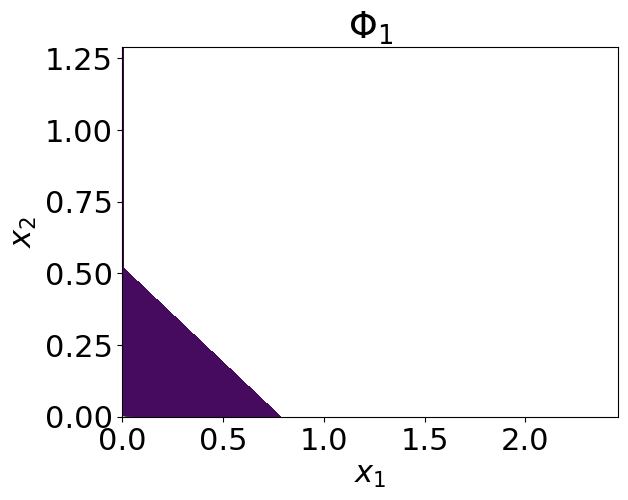

/var/folders/sx/4z1m0py94c98d4j3s1g4lz7m0000gn/T/ipykernel_23083/638740612.py:27: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x1_2d[20:,:], x2_2d[20:,:], Phi[20:,:], shading="auto", cmap="plasma")
/var/folders/sx/4z1m0py94c98d4j3s1g4lz7m0000gn/T/ipykernel_23083/638740612.py:28: UserWarning: The following kwargs were not used by contour: 'shading'
  plt.contourf(x1_2d[20:,:], x2_2d[20:,:], Phi[20:,:], 50, shading="auto", cmap="plasma", norm=LogNorm())


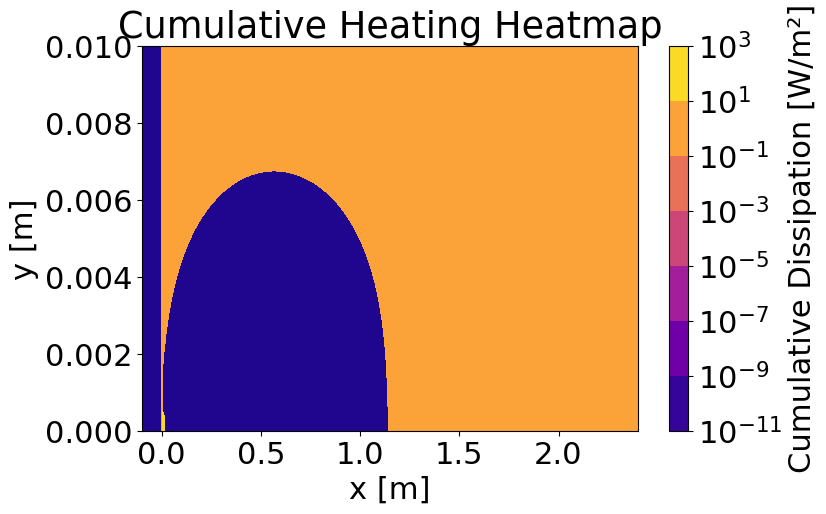

6081.2159635203825


array([[6.08121596e+03, 2.73965981e+03, 2.73697740e-10, 2.73907231e-10,
        2.74243181e-10, 2.74708002e-10, 2.75325298e-10, 2.76114241e-10,
        2.77092843e-10, 2.78281739e-10, 2.79703815e-10, 2.81383910e-10,
        2.83349038e-10, 2.85628632e-10, 2.88254710e-10, 2.94922239e-10,
        2.98348779e-10, 3.02235580e-10, 3.06627278e-10, 3.11572281e-10,
        3.17123122e-10, 3.27021197e-10, 3.33959305e-10, 3.41688745e-10,
        3.50281985e-10, 3.59817163e-10, 3.74088254e-10, 3.85769413e-10,
        3.98668651e-10, 4.12893828e-10, 4.32293983e-10, 4.49529365e-10,
        4.68468739e-10, 4.93017525e-10, 5.15820328e-10, 5.40807154e-10,
        5.71947285e-10, 6.01879682e-10, 6.38411657e-10, 6.74168493e-10,
        7.17044191e-10, 7.59657069e-10, 8.06138737e-10, 8.60670676e-10,
        9.15896777e-10, 9.79932503e-10, 1.04543255e-09, 1.12062443e-09,
        1.19818178e-09, 1.28645306e-09, 1.37813813e-09, 1.47776185e-09,
        1.58991603e-09, 1.70738105e-09, 1.83483834e-09, 1.973065

In [16]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
from matplotlib.colors import LogNorm

S_ij =  np.array([[dudx, 0.5 * (dudy + dvdx)],
                [0.5 * (dvdx + dudy), dvdy]])

grad_v_ij = np.array([[dudx, dudy],
                      [dvdx, dvdy]])

Phi = 2 * viscos * np.sum(S_ij * grad_v_ij, axis=(0, 1))


################################ contour plot of Phi
fig2 = plt.figure("Phi")
plt.contourf(x1_2d[20:,:], x2_2d[20:,:], Phi[20:,:], 50)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("contour dissipation plot")
plt.title(fr'$\Phi_1$')
# plt.colorbar()
plt.show()
# plt.savefig('Phi.png')

plt.figure(figsize=(8,5))
plt.pcolormesh(x1_2d[20:,:], x2_2d[20:,:], Phi[20:,:], shading="auto", cmap="plasma")
plt.contourf(x1_2d[20:,:], x2_2d[20:,:], Phi[20:,:], 50, shading="auto", cmap="plasma", norm=LogNorm())
plt.colorbar(label="Cumulative Dissipation [W/m²]")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.title("Cumulative Heating Heatmap")
plt.axis([-0.1,2.4,0,0.01])
plt.show()

t = np.max(Phi)
print(t)

display(Phi)

(2, 2, 252, 200) (2, 2, 252, 200)
[[6.08121596e+03 2.73965981e+03 2.73697740e-10 2.73907231e-10
  2.74243181e-10 2.74708002e-10 2.75325298e-10 2.76114241e-10
  2.77092843e-10 2.78281739e-10 2.79703815e-10 2.81383910e-10
  2.83349038e-10 2.85628632e-10 2.88254710e-10 2.94922239e-10
  2.98348779e-10 3.02235580e-10 3.06627278e-10 3.11572281e-10
  3.17123122e-10 3.27021197e-10 3.33959305e-10 3.41688745e-10
  3.50281985e-10 3.59817163e-10 3.74088254e-10 3.85769413e-10
  3.98668651e-10 4.12893828e-10 4.32293983e-10 4.49529365e-10
  4.68468739e-10 4.93017525e-10 5.15820328e-10 5.40807154e-10
  5.71947285e-10 6.01879682e-10 6.38411657e-10 6.74168493e-10
  7.17044191e-10 7.59657069e-10 8.06138737e-10 8.60670676e-10
  9.15896777e-10 9.79932503e-10 1.04543255e-09 1.12062443e-09
  1.19818178e-09 1.28645306e-09 1.37813813e-09 1.47776185e-09
  1.58991603e-09 1.70738105e-09 1.83483834e-09 1.97306588e-09
  2.12288664e-09 2.28517463e-09 2.46084993e-09 2.65087856e-09
  2.85627210e-09 3.07413003e-09 3.31

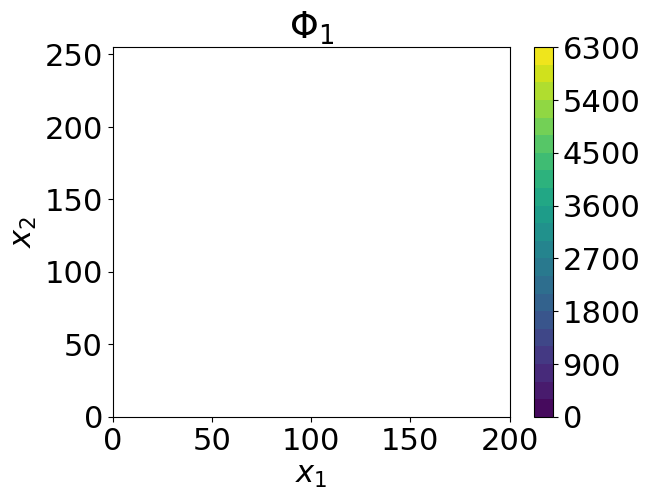

In [17]:

# Phi = viscos * np.array([[2 *dudx * dudx, (dudy + dvdx) * dudy],
#                          [(dvdx + dudy) * dvdx, 2 *dvdy * dvdy]])

S_ij =  np.array([[dudx, 0.5 * (dudy + dvdx)],
                [0.5 * (dvdx + dudy), dvdy]])

grad_v_ij = np.array([[dudx, dudy],
                      [dvdx, dvdy]])

print(np.shape(S_ij), np.shape(grad_v_ij))

tau_ij = 2 * viscos * S_ij


Phi = np.einsum('jikl, ijkl -> kl',tau_ij, grad_v_ij)
# Phi = tau_ij @ grad_v_ij
# Phi = tau_ij * grad_v_ij
# Phi = np.dot(tau_ij, grad_v_ij)


# Phi = np.sum(tau_ij.T * grad_v_ij, axis=(0, 1))

# Phi = tau_ij.T @ grad_v_ij

# Phi = 2 * viscos * np.sum(S_ij * grad_v_ij, axis=(0, 1))

print(Phi)
print(np.shape(Phi))

fig2 = plt.figure("Phi")
# plt.contourf(x1_2d[50,:], x2_2d[50,:], Phi[50,:], 50)
# plt.pcolormesh(x1_2d, x2_2d, Phi, shading = 'auto', cmap='plasma')
# plt.plot(x1_2d[50,:], x2_2d[50,:], Phi)
# plt.plot(x1_2d[50,:], x2_2d[50,:], Phi[50,:])
plt.contourf(x1_2d, x2_2d, Phi, levels=20, cmap='viridis')

plt.axis([0,200 ,0, 255])

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("contour dissipation plot")
plt.title(fr'$\Phi_1$')
plt.colorbar()
# plt.legend()
plt.show()